In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../data/'
df = pd.read_csv(data_path + 'ner.zip', encoding="latin1")

In [3]:
df.shape

(768960, 25)

In [4]:
df.head(9).T

,0,1,2,3,4,5,6,7,8
Unnamed: 0,0,1,2,3,4,5,6,7,8
lemma,thousand,of,demonstr,have,march,through,london,to,protest
next-lemma,of,demonstr,have,march,through,london,to,protest,the
next-next-lemma,demonstr,have,march,through,london,to,protest,the,war
next-next-pos,NNS,VBP,VBN,IN,NNP,TO,VB,DT,NN
next-next-shape,lowercase,lowercase,lowercase,lowercase,capitalized,lowercase,lowercase,lowercase,lowercase
next-next-word,demonstrators,have,marched,through,London,to,protest,the,war
next-pos,IN,NNS,VBP,VBN,IN,NNP,TO,VB,DT
next-shape,lowercase,lowercase,lowercase,lowercase,lowercase,capitalized,lowercase,lowercase,lowercase
next-word,of,demonstrators,have,marched,through,London,to,protest,the


In [5]:
df.dtypes

Unnamed: 0           int64
lemma               object
next-lemma          object
next-next-lemma     object
next-next-pos       object
next-next-shape     object
next-next-word      object
next-pos            object
next-shape          object
next-word           object
pos                 object
prev-iob            object
prev-lemma          object
prev-pos            object
prev-prev-iob       object
prev-prev-lemma     object
prev-prev-pos       object
prev-prev-shape     object
prev-prev-word      object
prev-shape          object
prev-word           object
sentence_idx       float64
shape               object
word                object
tag                 object
dtype: object

In [6]:
df.rename(columns={'Unnamed: 0': 'row-num'}, inplace=True)

## Check for missing values

In [7]:
df.isnull().sum()

row-num            0
lemma              0
next-lemma         0
next-next-lemma    0
next-next-pos      0
next-next-shape    0
next-next-word     0
next-pos           0
next-shape         1
next-word          1
pos                1
prev-iob           1
prev-lemma         1
prev-pos           1
prev-prev-iob      1
prev-prev-lemma    1
prev-prev-pos      1
prev-prev-shape    1
prev-prev-word     1
prev-shape         1
prev-word          1
sentence_idx       1
shape              1
word               1
tag                1
dtype: int64

Let's check and see if all of these missing values are in the same row

In [8]:
# Find index of row with missing value in 'word'
miss_idx = int(df[df['word'].isnull()]['row-num'])

# Print the row above and below
df[miss_idx-1:miss_idx+2]

,row-num,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
407597,407597,of,domin,countri,NNS,lowercase,countries,VBG,lowercase,domineering,...,the,DT,lowercase,the,lowercase,mercy,18616.0,lowercase,of,O
407598,407598,domin,countri,.,.,punct,.nister,O,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407599,687214,pascal,yoadimadji,has,VBZ,lowercase,has,NNP,capitalized,Yoadimadji,...,prime,JJ,capitalized,Prime,capitalized,Minister,31399.0,capitalized,Pascal,B-per


In [9]:
df.dropna(inplace=True)

## Explore Tags

This dataset came from Kaggle with this description of the tags:
    
The IOB Tagging system contains tags of the form:

B - {CHUNK_TYPE} – for the word in the Beginning chunk<br/>
I - {CHUNK_TYPE} – for words Inside the chunk<br/>
O – Outside any chunk<br/>
The IOB tags are further classified into the following classes –<br/>
<br/>
geo = Geographical Entity<br/>
org = Organization<br/>
per = Person<br/>
gpe = Geopolitical Entity<br/>
tim = Time indicator<br/>
art = Artifact<br/>
eve = Event<br/>
nat = Natural Phenomenon<br/>

In [15]:
# Find all the unique tags
unique_tags = df['tag'].unique()
print(unique_tags)

['O' 'B-geo' 'B-gpe' 'B-per' 'I-geo' 'B-org' 'I-org' 'B-tim' 'B-art'
 'I-art' 'I-per' 'I-gpe' 'I-tim' 'B-nat' 'B-eve' 'I-eve' 'I-nat']


### Examine 'I' tags

In [44]:
# Find some example of 'I' tags which are 'words inside the chunk'
# The word in the last column will be tagged as 'I-per'
# the word in the previous column should be either 'I-per', or 'B-per'
df[df['tag'] == 'I-per'][['prev-prev-word', 'prev-word', 'word']].head()

,prev-prev-word,prev-word,word
271,new,President,Mahmoud
272,President,Mahmoud,Ahmadinejad
332,",",Thomas,Horbach
444,interim,President,Abdullahi
445,President,Abdullahi,Yusuf


In [49]:
# Look at the context around one 'I-per' tag
df[269:274][['word', 'tag']]

,word,tag
269,new,O
270,President,B-per
271,Mahmoud,I-per
272,Ahmadinejad,I-per
273,said,O


### Find tag frequencies

In [50]:

# Strip the chunk type description from the tags
tag_base = []
for i in range(len(unique_tags)-1):
    tag_base.append(unique_tags[i+1].split('-')[1])
    
tag_base = np.unique(tag_base)
print(tag_base)

['art' 'eve' 'geo' 'gpe' 'nat' 'org' 'per' 'tim']


In [51]:
# Create a list of all tags and their counts
lab = []
cnt = []
i = 0
pre = [ 'B', 'I']
for t in tag_base:
    for p in pre:
        lab.append(p+'-'+t)
        cnt.append(np.sum(df['tag'] == lab[i]))
        
    i += 1

In [52]:
pd.DataFrame({'tags': lab, 'counts': cnt})

,tags,counts
0,B-art,290
1,I-art,290
2,B-eve,188
3,I-eve,188
4,B-geo,233
5,I-geo,233
6,B-gpe,200
7,I-gpe,200
8,B-nat,27582
9,I-nat,27582


### Frequency plot

As we can see in the plot below and the table above, the classes are very unbalanced. *Natural phenomenon*, *organizations* and *persons* are heavily represented.

<AxesSubplot:>

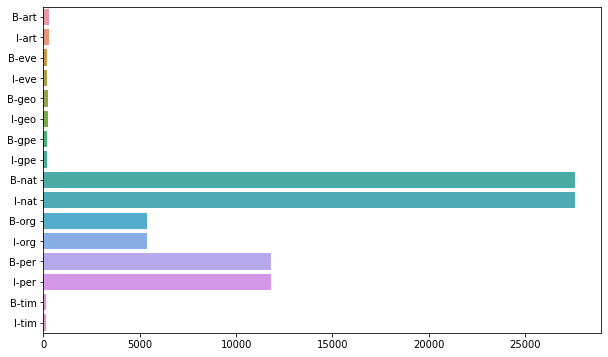

In [58]:
f, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=cnt, y=lab)

## Examine words

In [70]:
print('Number of unique words : ' + str(df['word'].unique().shape[0]))
print('Number of unique lemmas: ' + str(df['lemma'].unique().shape[0]))

Number of unique words : 30172
Number of unique lemmas: 20243


In [54]:
from wordcloud import WordCloud

def df2text(df):
    s = []
    i = 1
    for w in df:
        s.append(str(w))
    
    return ' '.join(s)

def draw_word_cloud(df, width=800, height=800):
    text = df2text(df)
    word_cloud = WordCloud(background_color='white', width=width, height=height).generate(text)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [8,8]
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

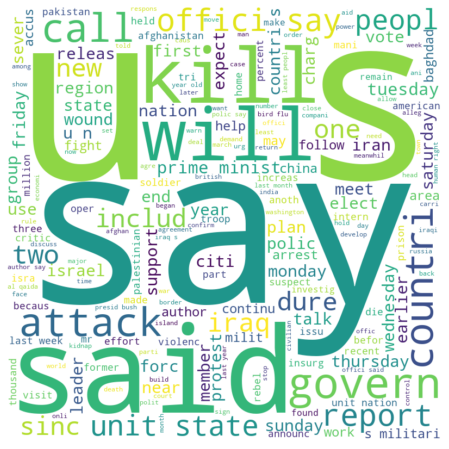

In [55]:
draw_word_cloud(df['lemma'])

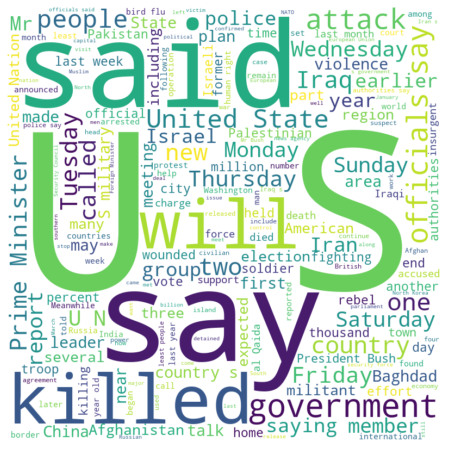

In [56]:
draw_word_cloud(df['word'])